# Here's my sweet notebook

In [1]:
# this is some code

### This is a smaller heading

but this is regular text

$f(x~|~\theta) = y$

In [2]:
import json
import matplotlib.pyplot as plt
import mpld3

%matplotlib inline
mpld3.enable_notebook()

/usr/local/opt/miniconda3/envs/py27/lib/python2.7/site-packages/traitlets/traitlets.py:809: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)


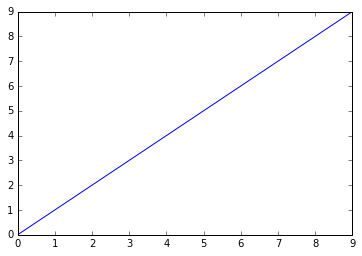

In [3]:
plt.plot(range(10), range(10))

In [4]:
data = json.load(open("stats-1.json"))

In [8]:
data[0], data[0]['pitches'].values()

({u'name': u'1000725b0aecd06a2bf6d65087df9fac.mid',
  u'pitches': {u'0': 309.9315082500002,
   u'1': 0,
   u'10': 224.75545706250048,
   u'11': 0,
   u'2': 240.9827135625,
   u'3': 0,
   u'4': 27.10792743750003,
   u'5': 385.6814324999998,
   u'6': 0,
   u'7': 111.05670712500017,
   u'8': 0.8011355625000043,
   u'9': 245.81225418750006}},
 [0,
  224.75545706250048,
  0,
  309.9315082500002,
  0,
  240.9827135625,
  385.6814324999998,
  27.10792743750003,
  111.05670712500017,
  0,
  245.81225418750006,
  0.8011355625000043])

In [9]:
# Filter out pitch counts that are probably corrupt
data = [x for x in data if sum(x['pitches'].values()) > 1]

In [10]:
len(data)

10802

In [12]:
import numpy as np

In [117]:
def compute_meta(item):
    diatonics = np.array([0, 2, 4, 5, 7, 9, 11])
    non_diatonics = np.array([1, 3, 6, 8, 10])
    # Turn the pitch counts into an array
    pitches = np.array([item['pitches'][str(p)] for p in range(12)])
    # Guess the tonic based on energy, returns an int
    tonic = np.argmax(pitches)
    
    # Sum diatonic energy
    dia_energy = pitches[(tonic + diatonics) % 12].mean()
    nondia_energy = pitches[(tonic + non_diatonics) % 12].mean()
    return dia_energy, nondia_energy

In [118]:
compute_meta(data[0])

(220.7611428750001, 0.16022711250000085)

In [119]:
coords = np.array([compute_meta(x) for x in data])
names = [x['name'] for x in data]

In [120]:
coords.shape, len(names)

((10802, 2), 10802)

In [121]:
from mpld3 import plugins

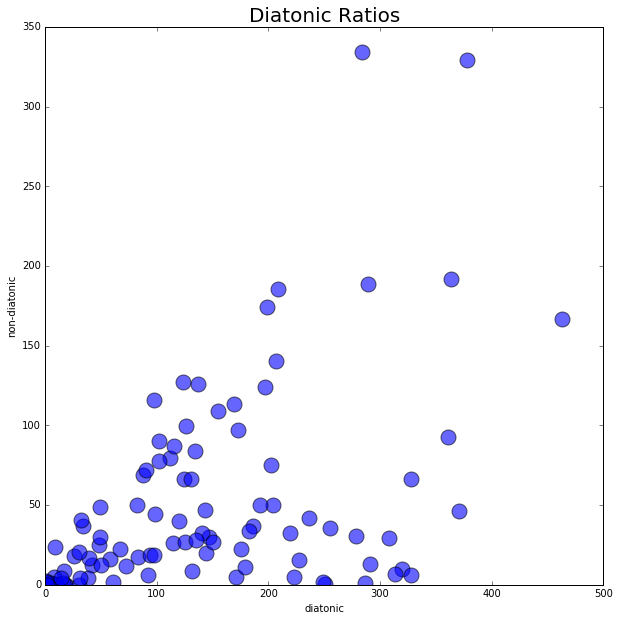

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))

idx = np.random.permutation(len(coords))[:100]
points = ax.plot(coords[idx, 0], coords[idx, 1], 'o', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('diatonic')
ax.set_ylabel('non-diatonic')
ax.set_title('Diatonic Ratios', size=20)
tooltip = plugins.PointHTMLTooltip(points[0], names,
                                   voffset=10, hoffset=10)
plugins.connect(fig, tooltip)

plt.show()